# Mapping Deprived Area

In [1]:
# import libraries

import sys
import numpy as np
import pandas as pd
from osgeo import gdal
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os

import utils
import util_preprocess

## Set working directory

In [6]:
# Get abosolute path of the current folder
FPATH = '/media/owusu/Extreme SSD/IDEAMAPS/Training_Dataset/Accra'

# Get abosolute output path of te current folder
OUTPUT = '/media/owusu/Extreme SSD/IDEAMAPS/Training_Dataset/Accra/output'

target = 'class'

# Random seed
random_seed = 42
# Set random seed in numpy
np.random.seed(random_seed)

## Load covariate features

In [7]:
PATH= f'/media/owusu/Extreme SSD/IDEAMAPS/covariate_feature_53bands/acc_covariate_compilation_53bands.tif'
img = utils.read_image(PATH)
img_arr=img[0]
img_gt=img[1]
img_georef=img[2]

# Process spfea features, get the width, height and number of bands
n = img_arr.shape[0]
print (n) # number of bands
h = img_arr.shape[1]
print (h) # height
w = img_arr.shape[2]
print (w) # width

53
562
842


## Convert covariate array to pandas dataframe

In [8]:
bandname = ['fs_dist_fs_2020', 'fs_dist_school_2020', 'in_dist_rd_2016', 'in_dist_rd_intersect_2016', 'in_dist_waterway_2016', 'in_night_light_2016',
'ph_base_water_2010', 'ph_bio_dvst_2015', 'ph_climate_risk_2020', 'ph_dist_aq_veg_2015', 'ph_dist_art_surface_2015', 'ph_dist_bare_2015',
'ph_dist_cultivated_2015', 'ph_dist_herb_2015', 'ph_dist_inland_water_2018', 'ph_dist_open_coast_2020', 'ph_dist_shrub_2015', 'ph_dist_sparse_veg_2015',
'ph_dist_woody_tree_2015', 'ph_gdmhz_2005', 'ph_grd_water_2000', 'ph_hzd_index_2011', 'ph_land_c1_2019', 'ph_land_c2_2020', 'ph_max_tem_2019',
'ph_ndvi_2019', 'ph_pm25_2016', 'ph_slope_2000', 'ses_an_visits_2016', 'ses_child_stunted_2016', 'ses_dpt3_2016', 'ses_hf_delivery_2016',
'ses_impr_water_src_2016', 'ses_ITN_2016', 'ses_m_lit_2016', 'ses_measles_2016', 'ses_odef_2016', 'ses_pfpr_2016', 'ses_preg_2016',
'ses_unmet_need_2016', 'ses_w_lit_2016', 'sh_dist_mnr_pofw_2019', 'sh_dist_pofw_2019', 'sh_ethno_den_2020', 'uu_bld_count_2020',
'uu_bld_den_2020', 'ho_impr_housing_2015', 'fs_dist_hf_2019', 'po_hrsl_2018', 'po_wp_2020', 'ph_dist_riv_network_2007', 'uu_urb_bldg_2018', 'ses_dist_gov_office_2022']


# Make dataframe
df_data=utils.make_data_frame(img_arr, bandname)
df_data.head()

(53, 562, 842)


,fs_dist_fs_2020,fs_dist_school_2020,in_dist_rd_2016,in_dist_rd_intersect_2016,in_dist_waterway_2016,in_night_light_2016,ph_base_water_2010,ph_bio_dvst_2015,ph_climate_risk_2020,ph_dist_aq_veg_2015,...,sh_ethno_den_2020,uu_bld_count_2020,uu_bld_den_2020,ho_impr_housing_2015,fs_dist_hf_2019,po_hrsl_2018,po_wp_2020,ph_dist_riv_network_2007,uu_urb_bldg_2018,ses_dist_gov_office_2022
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-3.402823e+38,-9999.0,-9999.0,255.0,-9999.0,0.344877
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-3.402823e+38,-9999.0,-9999.0,255.0,-9999.0,0.344203
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-3.402823e+38,-9999.0,-9999.0,255.0,-9999.0,0.343529
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-3.402823e+38,-9999.0,-9999.0,255.0,-9999.0,0.342857
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-3.402823e+38,-9999.0,-9999.0,255.0,-9999.0,0.342185


## Load training data

In [9]:
# PATH = f'{FPATH}/Tiles_merge.tif'
PATH = '/media/owusu/Extreme SSD/IDEAMAPS/Training_Dataset/Accra/New Folder/acc_150m_1000m_raster.tif'
train_set = utils.read_image(PATH)
train_array=train_set[0]
train_array = train_array.astype(int)
train_gt=train_set[1]
train_georef=train_set[2]
print (train_array.shape)

# Check unique values
(unique, counts) = np.unique(train_array, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

(562, 842)


array([[     0,   5085],
       [     1,   1739],
       [     3, 466380]])

In [10]:
train_col_name = ["class"]
tr_img_data = train_array.flatten()
df_train = pd.DataFrame(tr_img_data, columns=train_col_name)
df_train.head()
[df_train['class'].unique()]

[array([3, 1, 0])]

## Concatenate training and covariate features

In [11]:
# concat trainset and data
data_concat = pd.concat([df_train, df_data], axis=1)
print (data_concat.shape)


(473204, 54)


In [12]:
[data_concat['class'].unique()]

[array([3, 1, 0])]

In [13]:
df_full = data_concat.loc[data_concat['class'] != 3]
print(df_full.shape)
df_full.head()
[df_full['class'].unique()]

(6824, 54)


[array([1, 0])]

## Drop unwanted columns

In [14]:
# df_full = df_full.drop(columns=['ph_gdmhz_2005', 'ph_grd_water_2000', 'ph_hzd_index_2011', 'ph_base_water_2010', 'ses_pfpr_2016', 'ph_land_c1_2019', 'ph_land_c2_2020'])
df_full = df_full[['class', 'po_wp_2020', 'po_hrsl_2018', 'uu_bld_den_2020', 'uu_bld_count_2020', 'ph_slope_2000', 'ph_pm25_2016', 'ph_ndvi_2019', 'ph_bio_dvst_2015', 'ph_max_tem_2019', 'in_night_light_2016']]

## Split into train, validation and test

In [15]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and testing (20%)
df_train, df_test = train_test_split(df_full, train_size=0.77, random_state=random_seed)
# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.77, random_state=random_seed)
# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

print('df_train', df_train.shape)
print('df_val', df_val.shape)
print('df_test', df_test.shape)

df_train (4045, 11)
df_val (1209, 11)
df_test (1570, 11)


## Handling missing data

In [16]:
# Handling missing data
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Call nan_checker on df
df_nan = util_preprocess.nan_checker(df)

# Print df_nan
df_nan

# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,po_hrsl_2018,0.150791,float64
1,ph_slope_2000,0.101407,float64
2,po_wp_2020,0.061401,float64
3,uu_bld_den_2020,0.061254,float64
4,uu_bld_count_2020,0.061254,float64


In [17]:
# Imputing missing values
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Impute the variables with missing values in df_train, df_val and df_test
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

## Encoding data

In [18]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = util_preprocess.cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique


In [19]:
df.head()

,class,po_wp_2020,po_hrsl_2018,uu_bld_den_2020,uu_bld_count_2020,ph_slope_2000,ph_pm25_2016,ph_ndvi_2019,ph_bio_dvst_2015,ph_max_tem_2019,in_night_light_2016
0,0,126.389076,123.367966,1175.391724,10.0,2.00000,19.587614,0.298321,0.262951,33.734529,27.198030
1,1,158.944595,128.190315,7874.813965,67.0,1.00000,19.570431,0.130161,0.262951,33.721405,25.595955
2,0,140.574585,123.367966,1292.932617,11.0,2.00000,19.532793,0.427922,0.262951,33.736202,27.198030
3,0,180.606354,123.367966,2350.657471,20.0,-22.94513,20.684578,0.341253,0.262951,33.722603,18.679823
4,1,57.879581,10.144100,6229.076660,53.0,2.00000,16.512249,0.276962,0.260973,33.539795,6.012518


In [20]:
# Separating the training, validation and test data
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [21]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [22]:
# The StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

## CatBoost

In [23]:
import catboost
from catboost import CatBoostClassifier, Pool

params = {'loss_function':'Logloss', # objective function
          'eval_metric':'F1', # metric
          'early_stopping_rounds': 2000, # early stopping
          'verbose': 100, # output to stdout info about training process every 200 iterations
          'random_seed': random_seed,
         }
# model = CatBoostClassifier(**params, class_weights=[0.2, 0.8])
model = CatBoostClassifier(**params, scale_pos_weight=2.5)

model.fit(X_train, y_train, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_val, y_val), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True, # True for visualization of the training process (it is not shown in a published kernel - try executing this code)

         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044753
0:	learn: 0.8177524	test: 0.8038147	best: 0.8038147 (0)	total: 51ms	remaining: 51s
100:	learn: 0.8893892	test: 0.8833011	best: 0.8833011 (100)	total: 243ms	remaining: 2.16s
200:	learn: 0.9185784	test: 0.8898169	best: 0.8921694 (189)	total: 390ms	remaining: 1.55s
300:	learn: 0.9424182	test: 0.8937824	best: 0.8973947 (229)	total: 559ms	remaining: 1.3s
400:	learn: 0.9592803	test: 0.9008130	best: 0.9008130 (400)	total: 761ms	remaining: 1.14s
500:	learn: 0.9744802	test: 0.9008130	best: 0.9031839 (430)	total: 926ms	remaining: 922ms
600:	learn: 0.9806708	test: 0.9019608	best: 0.9049330 (591)	total: 1.09s	remaining: 723ms
700:	learn: 0.9861164	test: 0.9000989	best: 0.9049330 (591)	total: 1.24s	remaining: 527ms
800:	learn: 0.9921125	test: 0.9006928	best: 0.9049330 (591)	total: 1.39s	remaining: 346ms
900:	learn: 0.9944804	test: 0.9012876	best: 0.9049330 (591)	total: 1.54s	remaining: 169ms
999:	learn: 0.9961868	test: 0.9043078	best: 0.9061064 (948)	total: 1.69s	remai

### Model evaluation

In [24]:
from catboost.utils import eval_metric
# import CatBoost

predictions = model.predict(X_test)

F1 = eval_metric(y_test, predictions, 'F1')
Precision = eval_metric(y_test, predictions, 'Precision')
Recall = eval_metric(y_test, predictions, 'Recall')
print("F1:", F1)
print("Recall:", Recall)
print("Precision:", Precision)

F1: [0.8557213930348259]
Recall: [0.8911917098445595]
Precision: [0.8229665071770335]


## XGBoost

In [46]:
from xgboost import XGBClassifier

# params = {
#     'max_depth':7,
#     'learning_rate':0.1,
#     'early_stopping_rounds': 5
#     'num_estimators':1000,
#     'num_boost_round':1000
# }

params = {'loss_function':'Logloss', # objective function
         # 'num_estimators':1000,
          # 'learning_rate':0.001,
          'eval_metric':'error',
          # 'num_boost_round':1000,
          'early_stopping_rounds': 200, # early stopping
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': random_seed,
         }

model = XGBClassifier( **params, scale_pos_weight=2)
model.fit(X_train, y_train,
             eval_set=[(X_val, y_val)], verbose=True);

[09:38:22] WARNING: ../src/learner.cc:767: 
Parameters: { "loss_function", "random_seed", "verbose" } are not used.

[0]	validation_0-error:0.12903
[1]	validation_0-error:0.13151
[2]	validation_0-error:0.12821
[3]	validation_0-error:0.12655
[4]	validation_0-error:0.12159
[5]	validation_0-error:0.12076
[6]	validation_0-error:0.11580
[7]	validation_0-error:0.10587
[8]	validation_0-error:0.10174
[9]	validation_0-error:0.10174
[10]	validation_0-error:0.09512
[11]	validation_0-error:0.09595
[12]	validation_0-error:0.09843
[13]	validation_0-error:0.09760
[14]	validation_0-error:0.09264
[15]	validation_0-error:0.09347
[16]	validation_0-error:0.09677
[17]	validation_0-error:0.09016
[18]	validation_0-error:0.09264
[19]	validation_0-error:0.09098
[20]	validation_0-error:0.08768
[21]	validation_0-error:0.09181
[22]	validation_0-error:0.09016
[23]	validation_0-error:0.09016
[24]	validation_0-error:0.09016
[25]	validation_0-error:0.08602
[26]	validation_0-error:0.08768
[27]	validation_0-error:0.086

In [47]:
from catboost.utils import eval_metric
# import CatBoost

predictions = model.predict(X_test)

F1 = eval_metric(y_test, predictions, 'F1')
Precision = eval_metric(y_test, predictions, 'Precision')
Recall = eval_metric(y_test, predictions, 'Recall')
print("F1:", F1)
print("Recall:", Recall)
print("Precision:", Precision)

F1: [0.8564167725540025]
Recall: [0.8730569948186528]
Precision: [0.8403990024937655]


In [159]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions))

In [160]:
from catboost.utils import get_confusion_matrix

test_data = Pool(data=X_test,
                  label=y_test,
                  )
# Set column names
# col_names = [ 'fs_dist_fs_2020', 'fs_dist_school_2020', 'in_dist_rd_2016',
#        'in_dist_rd_intersect_2016', 'in_dist_waterway_2016',
#        'in_night_light_2016', 'ph_bio_dvst_2015', 'ph_climate_risk_2020',
#        'ph_dist_aq_veg_2015', 'ph_dist_art_surface_2015', 'ph_dist_bare_2015',
#        'ph_dist_cultivated_2015', 'ph_dist_herb_2015',
#        'ph_dist_inland_water_2018', 'ph_dist_open_coast_2020',
#        'ph_dist_shrub_2015', 'ph_dist_sparse_veg_2015',
#        'ph_dist_woody_tree_2015',
#        'ph_max_tem_2019', 'ph_ndvi_2019', 'ph_pm25_2016', 'ph_slope_2000',
#        'ses_an_visits_2016', 'ses_child_stunted_2016', 'ses_dpt3_2016',
#        'ses_hf_delivery_2016', 'ses_impr_water_src_2016', 'ses_ITN_2016',
#        'ses_m_lit_2016', 'ses_measles_2016', 'ses_odef_2016', 'ses_preg_2016',
#        'ses_unmet_need_2016', 'ses_w_lit_2016', 'sh_dist_mnr_pofw_2019',
#        'sh_dist_pofw_2019', 'sh_ethno_den_2020', 'uu_bld_count_2020',
#        'uu_bld_den_2020', 'ho_impr_housing_2015', 'fs_dist_hf_2019',
#        'po_hrsl_2018', 'po_wp_2020', 'ph_dist_riv_network_2007',
#        'uu_urb_bldg_2018', 'ses_dist_gov_office_2022']

col_names = ['uu_urb_bldg_2018', 'po_wp_2020', 'po_hrsl_2018', 'uu_bld_den_2020', 'uu_bld_count_2020', 'ph_slope_2000', 'ph_pm25_2016', 'ph_ndvi_2019', 'ph_climate_risk_2020', 'ph_bio_dvst_2015', 'ph_max_tem_2019', 'in_night_light_2016']
# test_data.set_feature_names(col_names)

# confusion = get_confusion_matrix(model, test_data, thread_count=-1)
# confusion

### Feature of importance

In [161]:
data = pd.DataFrame({'feature_importance': model.get_feature_importance(test_data),
              'feature_names': col_names}).sort_values(by=['feature_importance'],
                                                     ascending=False)
data.head(15)

AttributeError: 'XGBClassifier' object has no attribute 'get_feature_importance'

## Inference

In [48]:
df_data['uid'] = np.arange(start=0,stop = len(df_data), dtype=int)
# df_data = df_data.drop(columns=['ph_gdmhz_2005', 'ph_grd_water_2000', 'ph_hzd_index_2011', 'ph_base_water_2010', 'ses_pfpr_2016', 'ph_land_c1_2019', 'ph_land_c2_2020'])
df_data = df_data[['po_wp_2020', 'po_hrsl_2018', 'uu_bld_den_2020', 'uu_bld_count_2020', 'ph_slope_2000', 'ph_pm25_2016', 'ph_ndvi_2019', 'ph_bio_dvst_2015', 'ph_max_tem_2019', 'in_night_light_2016', 'uid']]
print(df_data.shape)
df_data.head()

(473204, 11)


/tmp/ipykernel_7692/2239855496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['uid'] = np.arange(start=0,stop = len(df_data), dtype=int)


,po_wp_2020,po_hrsl_2018,uu_bld_den_2020,uu_bld_count_2020,ph_slope_2000,ph_pm25_2016,ph_ndvi_2019,ph_bio_dvst_2015,ph_max_tem_2019,in_night_light_2016,uid
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,1
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,3
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,4


In [49]:
# df_data['orb_sc40_mean'] = df_data['orb_sc40_mean'].fillna(value=-9999)
data_X1 = df_data.copy()
data_X = data_X1.loc[ data_X1['po_wp_2020'] != -9999 ]
data_X = data_X.copy()
# data_X = data_X.loc[ data_X['po_wp_2020'] != 0 ]
data_uid = data_X
data_x  = data_X.drop(columns=['uid'])

data_uid['catid'] = np.arange(start=0,stop = len(data_uid), dtype=int)



In [50]:
# Handling missing data

## Check and count for NaN values by column in the table
if data_X.isnull().any().any():
    for colomn in list(data_X.columns.values):
        if data_X[colomn].isnull().any():
            print ("Column '"+str(colomn)+"' have "+str(data_X[colomn].isnull().sum())+" NULL values")
else: print ("No missing values in dataframe")

## Check and count for Inf values by column in the table
if np.isinf(data_X).any().any():
    for colomn in list(data_X.columns.values):
        if np.isinf(data_X[colomn]).any():
            print ("Column '"+str(colomn)+"' have "+str(np.isinf(data_X[colomn]).sum())+" Infinite values")
else: print ("No infinite values in dataframe")

Column 'po_wp_2020' have 101836 NULL values
Column 'po_hrsl_2018' have 144484 NULL values
Column 'uu_bld_den_2020' have 101796 NULL values
Column 'uu_bld_count_2020' have 101796 NULL values
Column 'ph_slope_2000' have 25565 NULL values
Column 'ph_ndvi_2019' have 21 NULL values
No infinite values in dataframe


In [51]:

from sklearn.impute import SimpleImputer

# The SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')
data_x_tran = si.fit_transform(data_x)


# # Standardize  data
data_x_scale = ss.fit_transform(data_x_tran)

In [52]:
# REDICTION
pred_map = model.predict(data_x_scale)


In [53]:
# Convert narray to dataframe
col_name = ['pred']
predictions_image = pd.DataFrame(pred_map, columns=col_name)
predictions_image['catid'] = np.arange(start=0,stop = len(predictions_image), dtype=int) # add a uniques id to merge
print(predictions_image.shape)
predictions_image.head()

(250376, 2)


,pred,catid
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [54]:
# merge prediction to data_x (data with useful info)
map_data = predictions_image.merge(data_uid, how='inner', on='catid')
# map_data = pd.concat([predictions_image, data_x], axis=1 )
print (map_data.shape)
#
# set index for merging with big image data
map_data  = map_data.set_index('uid')
df1  = df_data.set_index('uid')

(250376, 13)


In [55]:
# merge to bg image data
predictions_image_merge = pd.merge(df1, map_data, how='outer', right_index=True, left_index=True)


predictions_image = predictions_image_merge['pred'].values

print(predictions_image.shape)

(473204,)


In [56]:
(unique, counts) = np.unique(predictions_image, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[0.00000e+00, 1.51440e+05],
       [1.00000e+00, 9.89360e+04],
       [        nan, 2.22828e+05]])

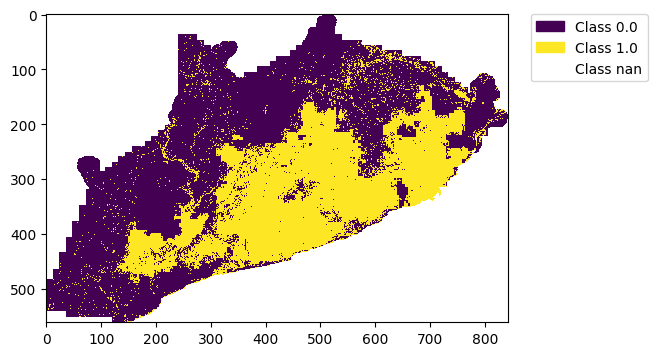

In [57]:
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

h = img_arr.shape[1]
w = img_arr.shape[2]

pred_map = predictions_image.reshape(h, w)


values = np.unique(pred_map.ravel())

plt.figure(figsize=(8,4))
im = plt.imshow(pred_map, interpolation='none')

# get the colors of the values, according to the
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color
patches = [ mpatches.Patch(color=colors[i], label="Class {l}".format(l=values[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()